# Differential Calculus & Linear Algebra for Neural Networks

### Table of Contents
1. Notebook Setup
2. Algebra Review
3. Differential Calculus
  1. Concepts of Limits: Optimum and Convergence
  2. Rules of Differential Calculus
4. Multivariable Calculus
  1. Representing Functions as Computation Graphs
  2. Compute Derivatives over Computation Graphs
5. Linear Algebra
  1. Dot Product
  2. System of Linear Equations

### Notebook Setup

Install the python packages in the next cell before running the rest of this notebook.

## Algebra review

### Slope of a line

Remember from algebra:

$$
y=mx+b
$$

Definition of slope:
- $m$ is the slope corresponding to a single $x$.
- Remember that when determining the slope, we don't care about how the line is shifted, so we can ignore $b$, by setting to zero $b=0$ and then solving for $m$, given two points on the line.
- What does the slope represent?
  - It represents the relationship between $x$ and $y$. It answers how $y$ changes as $x$ changes.

$$
\begin{align}
   m &= \frac{Δ y}{\Delta x}\\
   &= \frac{y_{1}-y_{0}}{x_{1}-x_{0}}
\end{align}
$$

Definitions and question to keep in mind:

- $x$ is scalar input variable given by the user.
  - What does the scalar represent?
- $y$ **models** a straight line given $x$.
  - What are we modeling?
- $m$ and $b$ are **parameters** of the model $y$.
  - How do we set these parameters?



## Differential Calculus

**Limit** - the slope at a point on a function as you approach that point.

$$
\underset{\Delta\rightarrow 0}{\text{lim}}\ f(x)=\frac{f(x+Δ)-f(x)}{\Delta}
$$

**Derivative** - the *rate of change* as a point is approached on a function.

In [ ]:
from typing import Callable

def limit(x: float, delta: float, func: Callable) -> float:
  assert delta > 0
  return (func(x + delta) - func(x))/delta

x = 1
delta = 0.0000001
func = lambda x: x**2
limit(x, delta, func)

2.0000001010878066

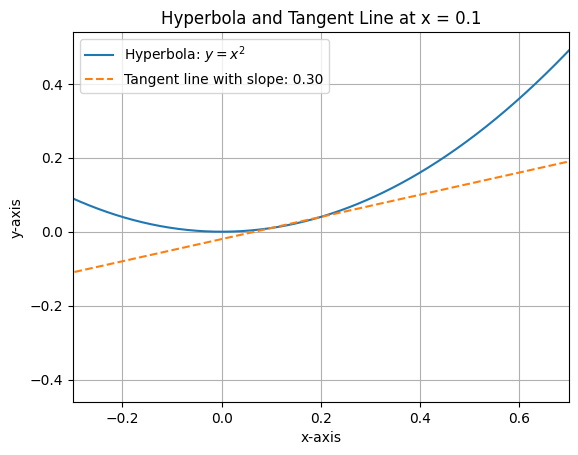

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

def limit(x: float, delta: float, func: Callable) -> float:
    assert delta != 0
    return (func(x + delta) - func(x))/delta

def func(x):
    return x**2

x = 0.2
delta = -0.1

# Calculate the slope at the given point using the limit function
slope = limit(x, delta, func)

# Generate points for the hyperbola
x_vals = np.linspace(x-1, x+1, 1000)
y_vals = func(x_vals)

# Generate points for the tangent line
tangent_x = np.linspace(x-1, x+1, 1000)
tangent_y = slope * (tangent_x - x) + func(x)

# Plot the hyperbola and tangent line
plt.plot(x_vals, y_vals, label="Hyperbola: $y=x^2$")
plt.plot(tangent_x, tangent_y, label=f"Tangent line with slope: {slope:.2f}", linestyle="--")

# Zoom to the point of interest
plt.xlim(x-0.5, x+0.5)
plt.ylim(func(x)-0.5, func(x)+0.5)

# Add labels and legend
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title(f"Hyperbola and Tangent Line at x = {x+delta}")
plt.grid()

# Show the plot
plt.show()


### Concepts of Limits: Optimum and Convergence

- **Local minimum** - a point on a function where the value of the function is smaller than its value at any nearby points.
- **Global minimum** - a point on a function where the value of the function is smaller than its value at all other points.
- **Local maximum** - a point on a function where the value of the function is greater than its value at any nearby points.
- **Global maximum** - a point on a function where the value of the function is greater than its value at all other points.
- **Convergence** - a property of approaching a finite limit as a variable monotonically changes.
- **Divergence** - a property where as a variable monotonically changes, there is not finite limit.

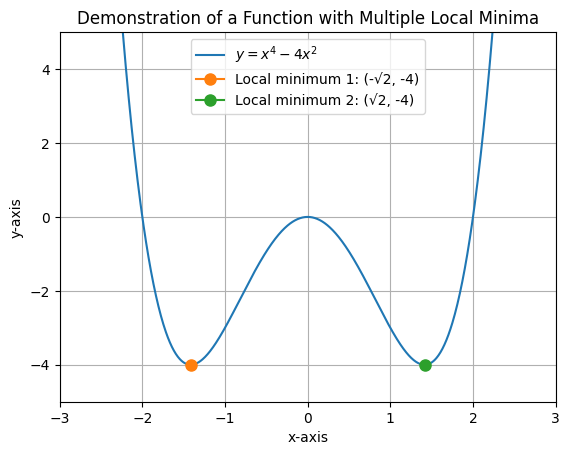

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**4 - 4*x**2

# Generate points for the function
x_vals = np.linspace(-3, 3, 1000)
y_vals = func(x_vals)

# Find the local minimum points
x_min1 = -(2**.5)
x_min2 = 2**.5
y_min1 = func(x_min1)
y_min2 = func(x_min2)

# Plot the function and local minimum points
plt.plot(x_vals, y_vals, label="$y = x^4 - 4x^2$")
plt.plot(x_min1, y_min1, marker="o", markersize=8, label="Local minimum 1: (-√2, -4)")
plt.plot(x_min2, y_min2, marker="o", markersize=8, label="Local minimum 2: (√2, -4)")

# Set plot limits and labels
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title("Demonstration of a Function with Multiple Local Minima")
plt.grid()

# Show the plot
plt.show()


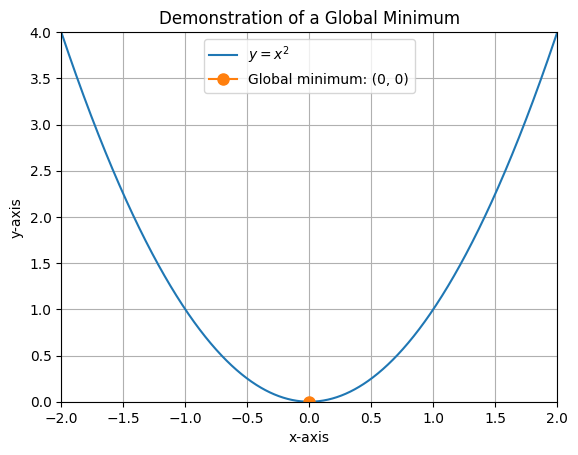

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**2

# Generate points for the function
x_lim = 2
x_vals = np.linspace(-x_lim, x_lim, 1000)
y_vals = func(x_vals)

# Find the local minimum point
x_min = 0
y_min = func(x_min)

# Plot the function and local minimum point
plt.plot(x_vals, y_vals, label="$y = x^2$")
plt.plot(x_min, y_min, marker="o", markersize=8, label=f"Global minimum: ({x_min}, {y_min})")

# Set plot limits and labels
plt.xlim(-x_lim, x_lim)
plt.ylim(0, 4)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title("Demonstration of a Global Minimum")
plt.grid()

# Show the plot
plt.show()


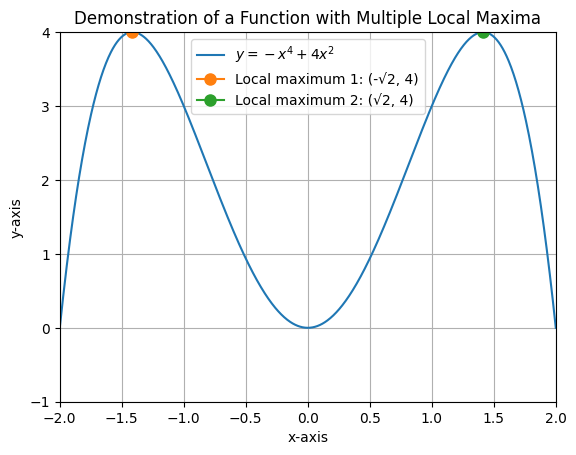

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return -x**4 + 4*x**2

# Generate points for the function
x_vals = np.linspace(-2, 2, 1000)
y_vals = func(x_vals)

# Find the local maximum points
x_max1 = -(2**0.5)
x_max2 = (2**0.5)
y_max1 = func(x_max1)
y_max2 = func(x_max2)

# Plot the function and local maximum points
plt.plot(x_vals, y_vals, label="$y = -x^4 + 4x^2$")
plt.plot(x_max1, y_max1, marker="o", markersize=8, label=f"Local maximum 1: (-√2, 4)")
plt.plot(x_max2, y_max2, marker="o", markersize=8, label=f"Local maximum 2: (√2, 4)")

# Set plot limits and labels
plt.xlim(-2, 2)
plt.ylim(-1, 4)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title("Demonstration of a Function with Multiple Local Maxima")
plt.grid()

# Show the plot
plt.show()


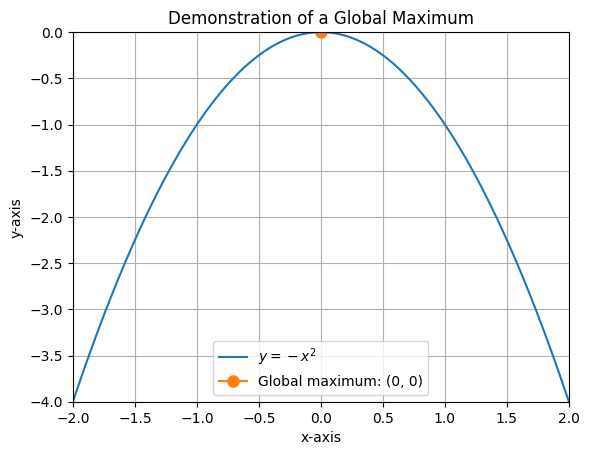

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return -(x**2)

# Generate points for the function
x_lim = 2
x_vals = np.linspace(-x_lim, x_lim, 1000)
y_vals = func(x_vals)

# Find the local minimum point
x_min = 0
y_min = func(x_min)

# Plot the function and local minimum point
plt.plot(x_vals, y_vals, label="$y = -x^2$")
plt.plot(x_min, y_min, marker="o", markersize=8, label=f"Global maximum: ({x_min}, {y_min})")

# Set plot limits and labels
plt.xlim(-x_lim, x_lim)
plt.ylim(-4, 0)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title("Demonstration of a Global Maximum")
plt.grid()

# Show the plot
plt.show()


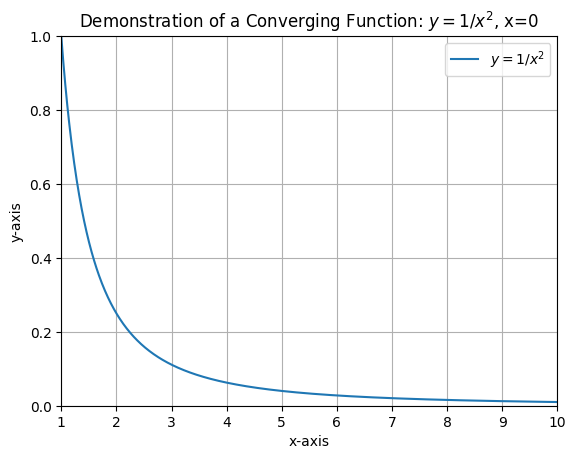

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 1/x**2

# Generate points for the function
x_vals = np.linspace(1, 10, 1000)
y_vals = func(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label="$y = 1/x^2$")

# Set plot limits and labels
plt.xlim(1, 10)
plt.ylim(0, 1)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title("Demonstration of a Converging Function: $y = 1/x^2$, x=0")
plt.grid()

# Show the plot
plt.show()


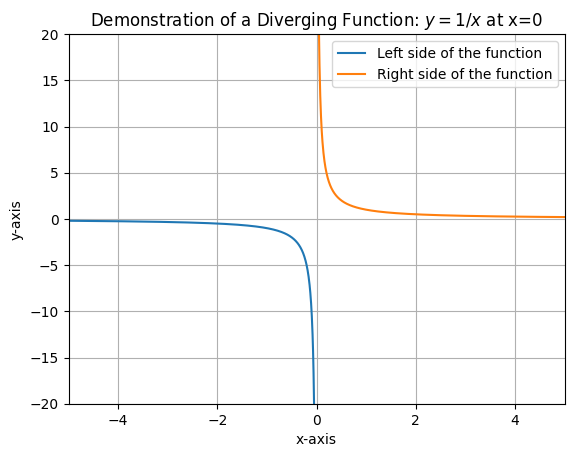

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 1/x

# Generate points for the function
x_vals_left = np.linspace(-5, -0.01, 1000)
x_vals_right = np.linspace(0.01, 5, 1000)
y_vals_left = func(x_vals_left)
y_vals_right = func(x_vals_right)

# Plot the function
plt.plot(x_vals_left, y_vals_left, label="Left side of the function")
plt.plot(x_vals_right, y_vals_right, label="Right side of the function")

# Set plot limits and labels
plt.xlim(-5, 5)
plt.ylim(-20, 20)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.title("Demonstration of a Diverging Function: $y = 1/x$ at x=0")
plt.grid()

# Show the plot
plt.show()


### Rules of Differential Calculus

Without getting into derivations, there are some basic rules that are important for calculus:

- **Constant Rule** - the derivative of a constant is zero.

$$
\begin{align}
  f(x) &= c\\
  f'(x)&= 0
\end{align}
$$

- **Sum/ Difference Rule** - the derivative of a sum is the sum of derivatives.

$$
\begin{align}
  \frac{d}{dx}f(x) + g(x) = f'(x) + g'(x)
\end{align}
$$

- **Power Rule** - the derivative of a polynomial is $n$ times the polynomial to one less power.

$$
\begin{align}
  \frac{d}{dx}x^{n} = n\cdot x^{n-1}
\end{align}
$$

- **Product Rule** - the derivative of product of functions.

$$
\begin{align}
  \frac{d}{dx}f(x)g(x) = f'(x)g(x) + f(x)g'(x)
\end{align}
$$

- **Quotient Rule** - the derivative of the division of functions.

$$
\begin{align}
  \frac{d}{dx}f(x)g(x) = \frac{f'(x)g(x) - f(x)g'(x)}{g^{2}(x)}
\end{align}
$$

- **Chain Rule** - the derivative of a composition of functions is the product of the derivatives.

**Lagrange notation:**

$$
\begin{align}
  \frac{d}{dx}(f(g(x))) = f'(g(x))\cdot g'(x)
\end{align}
$$

**Leibniz notation:**

$$
\frac{df}{dx}=\frac{df}{dg}\cdot\frac{dg}{dx}
$$

## Multivariable Calculus


**Core concept**

- **Partial Derivatives** - A partial derivative of a function of several variables is the derivative of that function with respect to one of its variables, holding all other variables constant.

**Example 1**

Special case when taking the partial derivative of a function.

$$
\begin{align}
  f(x) &= x\\
  \implies\ \frac{d}{dx}f(x)&=\frac{d}{dx}x=\frac{\partial x}{\partial x}\\
  \frac{\partial x}{\partial x} &= x^{1-1}\\
  &= 1
\end{align}
$$

**Example 2**

Here we take the partial derivative of a simple function that computes products.

This will be useful later for the computational graph example.

$$
\begin{align}
  f(a,x) &= ax\\
  \frac{\partial f}{\partial a} &= xa^1\\
  &=x\cdot 1\cdot a^{1-1}\\
  &=x\\
  \frac{\partial f}{\partial x}&=ax\\
  &=a\cdot 1\cdot x^{1-1}\\
  &=a
\end{align}
$$

**Example 3**

Let's find the partial derivatives of all the variables.

This will be important later for linear algebra.

$$
\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}
$$

$$
f(x,y,z) = x+y+z
$$

For x

$$
\begin{align}
  \frac{\partial f(x,y,z)}{\partial x}&=\frac{\partial f}{\partial x}x+\frac{\partial f}{\partial x}y+\frac{\partial f}{\partial x}z\\
  &=1 + 0 + 0
\end{align}
$$

For y

$$
\begin{align}
  \frac{\partial f(x,y,z)}{\partial y}&=\frac{\partial f}{\partial y}x+\frac{\partial f}{\partial y}y+\frac{\partial f}{\partial y}z\\
  &=0 + 1 + 0
\end{align}
$$

For z

$$
\begin{align}
  \frac{\partial f(x,y,z)}{\partial z}&=\frac{\partial f}{\partial z}x+\frac{\partial f}{\partial z}y+\frac{\partial f}{\partial z}z\\
  &=0 + 0 + 1
\end{align}
$$

**Example 4**

Consider a function 

$$
f(x,y) = 3x^2 + 2xy + y^2 
$$

The partial derivative of f with respect to $x$, denoted by $\frac{\partial f}{\partial x}$, is obtained by differentiating $f$ with respect to $x$ while treating $y$ as a constant:

$$
\frac{\partial f}{\partial x} = 6x + 2y
$$

Similarly, the partial derivative of $f$ with respect to $y$, denoted by $\frac{\partial f}{\partial y}$, is obtained by differentiating $f$ with respect to $y$ while treating $x$ as a constant:

$$
\frac{\partial f}{\partial y} = 2x + 2y
$$

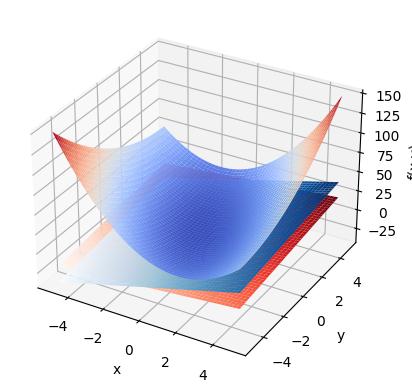

In [ ]:
# Example 4

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x: float, y: float) -> float:
    return 3 * x ** 2 + 2 * x * y + y ** 2

def df_dx(x: float, y: float) -> float:
    return 6 * x + 2 * y

def df_dy(x: float, y: float) -> float:
    return 2 * x + 2 * y

x_vals: np.ndarray = np.linspace(-5, 5, 50)
y_vals: np.ndarray = np.linspace(-5, 5, 50)
x: np.ndarray
y: np.ndarray
x, y = np.meshgrid(x_vals, y_vals)

z: np.ndarray = f(x, y)
z_x: np.ndarray = df_dx(x, y)
z_y: np.ndarray = df_dy(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
ax.plot_surface(x, y, z_x, cmap='Blues')
ax.plot_surface(x, y, z_y, cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

### Representing Functions as Computation Graphs

A more general way to represent functions and derivatives is to visualize functions as computation graphs. Computation graphs are representations for expanding a function into their granualar operations.

We'll use this multivariable function for the following code examples.

$$
h(x,y,z)=(x+y)*z
$$

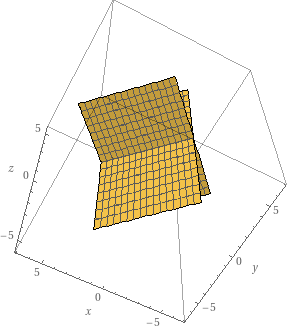

In [ ]:
# Example based on Andrej Karpathy's Stanford cs231n
# https://youtu.be/i94OvYb6noo?t=373

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation
from IPython.display import HTML

# Create Graph
G = nx.DiGraph()
G.add_node('x', label='x')
G.add_node('y', label='y')
G.add_node('z', label='z')
G.add_node('+', label='+')
G.add_node('*', label='*')
G.add_node('h', label='h')

edges = [('x', '+', '-2'), ('y', '+', '5'), ('+', '*', '3'), ('z', '*', '-4'), ('*', 'h', '-12')]
G.add_weighted_edges_from(edges)

pos = {
    'x': (0, .9),
    'y': (0, .7),
    'z': (0, .5),
    '+': (1, .8),
    '*': (2, .7),
    'h': (3, .7)
}

# Build plot
fig, ax = plt.subplots(figsize=(8, 4))
plt.close()

def update(num):
    ax.clear()
    edge_order = [(edges[num][0], edges[num][1])]
    
    # Background nodes
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    nx.draw_networkx_nodes(G, pos=pos, node_color='#000', node_size=1300, ax=ax)
    nx.draw_networkx_labels(G, pos=pos, font_weight='bold', font_color='#FFF', ax=ax)

    # Animate edges
    animated_edges = nx.draw_networkx_edges(G, pos=pos, edgelist=edge_order, edge_color='blue', width=2, ax=ax)

    # Draw edge labels
    edge_labels = {(u, v): label for u, v, label in edges[:num+1]}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, ax=ax)

    # Scale plot ax
    ax.set_title(f"Forward pass of h(x,y,z)=(x+y)*z", fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(edges), interval=1000, repeat=True)
HTML(ani.to_jshtml())


### Compute Derivatives over Computation Graphs

After the forward pass, we recursively compute the derivatives starting from the node $h$.

1. Recall from Example 1 above:
$$
\frac{\partial h}{\partial h}=1
$$

2. Now assign the + node the variable $q$ and compute the partial derivatives of $h$ w.r.t. $q$ and $z$ using the result from step 1 by following Example 2 above:

$$
\frac{\partial h}{\partial q} = -4,\quad \frac{\partial h}{\partial z} = 3
$$

3. Compute the partial derivatives of $q$ w.r.t. $x$ and $y$ by following Example 3 above:

$$
\begin{align}
  q(x,y) &= x + y\\
  \frac{\partial}{\partial x}q(x,y) &= \frac{\partial}{\partial x}x+\frac{\partial}{\partial x}y\\
  &=1 + 0\\
  \implies\frac{\partial q}{\partial x}&=1\\
  \frac{\partial}{\partial y}q(x,y) &= \frac{\partial}{\partial y}x+\frac{\partial}{\partial y}y\\
  &=0 + 1\\
  \implies\frac{\partial q}{\partial y}&=1
\end{align}
$$

4. Compute the partial derivatives of $h$ w.r.t $x$ and $y$ using the results from step 2 and 3 and the Chain Rule of Differential Calculus:

$$
\begin{align}
  \frac{\partial h}{\partial y} &= \frac{\partial h}{\partial q}\cdot\frac{\partial q}{\partial y}\\
  &=-4\cdot 1
\end{align}
$$

$$
\begin{align}
  \frac{\partial h}{\partial x} &= \frac{\partial h}{\partial q}\cdot\frac{\partial q}{\partial x}\\
  &=-4\cdot 1
\end{align}
$$

This results in our gradients for $x$, $y$, and $z$.

$$
\begin{bmatrix}
\frac{\partial h}{\partial x}\\
\frac{\partial h}{\partial y}\\
\frac{\partial h}{\partial z}
\end{bmatrix}
=\begin{bmatrix}
-4\\
-4\\
3
\end{bmatrix}
$$

**Recap:** Remember that taking the derivative gives you the slope. Thus, what we've shown is that at the ***point***

$$
x=
\begin{bmatrix}
-2\\
5\\
-4
\end{bmatrix}
$$

on the ***function*** 

$$
h(x,y,z)=(x+y)*z
$$

the ***gradient*** (multi-dimensional slope/rate of change of the function) is 

$$
\begin{bmatrix}
\frac{\partial h}{\partial x}\\
\frac{\partial h}{\partial y}\\
\frac{\partial h}{\partial z}
\end{bmatrix}
=\begin{bmatrix}
-4\\
-4\\
3
\end{bmatrix}
$$

An important property to notice is that the gradients for $\frac{\partial q}{\partial x}$ and $\frac{\partial q}{\partial y}$ can be computed on the forward pass. We refer to these intermediate gradients as **local gradients**.

Additionally, $\frac{\partial h}{\partial x},\ \frac{\partial h}{\partial y},\ \frac{\partial h}{\partial z}$ are only concerned with the gradients required by their immediate neighbors. The function could be much more deeply nested, but to compute those values, they do not need a global view of how $\frac{\partial h}{\partial h}$ and anything else gets computed. Their dependencies are local.

The next cell below illustrates this derivation.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation
from IPython.display import HTML

# Create Graph
G = nx.DiGraph()
G.add_node('x', label='x')
G.add_node('y', label='y')
G.add_node('z', label='z')
G.add_node('+', label='a')
G.add_node('*', label='*')
G.add_node('h', label='h')

starting_edges = [('x', '+', '-2'), ('y', '+', '5'), ('+', '*', '3'), ('z', '*', '-4'), ('*', 'h', '-12')]
update_edges = [('x', '+', '∂h/∂q*∂q/∂x=-4'), ('y', '+', '∂h/∂q*∂q/∂y=-4'), ('+', '*', '∂h/∂q*∂h/∂h=-4'), ('z', '*', '∂h/∂z*∂h/∂h=3'), ('*', 'h', '∂h/∂h=1')]
update_edges.reverse()
G.add_weighted_edges_from(starting_edges)

pos = {
    'x': (0, .9),
    'y': (0, .7),
    'z': (0, .5),
    '+': (1, .8),
    '*': (2, .7),
    'h': (3, .7)
}

# Build plot
fig, ax = plt.subplots(figsize=(8, 4))
plt.close()

def update(num):
    ax.clear()
    
    # Background nodes
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    nx.draw_networkx_nodes(G, pos=pos, node_color='#000', node_size=1300, ax=ax)
    nx.draw_networkx_labels(G, pos=pos, font_weight='bold', font_color='#FFF', ax=ax)

    # Draw initial edge labels
    initial_edge_labels = {(u, v): label for u, v, label in starting_edges}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=initial_edge_labels, ax=ax)

    # Draw iteration edge labels
    edge_labels = {(u, v): label for u, v, label in update_edges[:num+1]}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, ax=ax, font_color='red')

    # Scale plot ax
    ax.set_title(f"Backward pass of h(x,y,z)=(x+y)*z", fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(update_edges), interval=1000, repeat=True)
HTML(ani.to_jshtml())


## Linear Algebra

**Definitions**

**Scalar** - a value with no dimensions.

**Matrix** - a table of coefficients representing a system of linear equations in which each row represents an equation

**Vector** - a one-dimensional matrix representing a point where each element corresponds to a different dimension/axis

$$
\theta_{0}x_{0} + \theta_{1}x_{1} = y
$$

in matrix notation becomes

$$
    \begin{bmatrix}
        \theta_{0} & \theta_{1}
    \end{bmatrix}
    \begin{bmatrix}
        x_{0}\\
        x_{1}
    \end{bmatrix}
    =y
$$

Matrix $A$ with $m\times n$ dimensions is said to exist $m\times n$ space, denoted $A\in\mathbb{R}^{m\times n}$.

Vector $b$ with $n$ dimensions is said to exist in $n$ space, denoted $\overset{\rightarrow}{b}\in\mathbb{R}^{n}$.


**Column vector** - column of a matrix

By convention, all vectors are assumed to be column vectors, denoted $\overset{\rightarrow}{v}$.

**Row vector** - row of a matrix representing all the coefficients of a linear equation.

**Tensor** - A multi-dimensional vector e.g. $R^{m\times n\times o...}$

**Transpose** - e.g. The transpose of $R^{m\times n}$ is $R^{n\times m}$. Visually, this just means spinning the tensor about the diagonal. For now, only consider two dimensional tensors (matrices).

### Dot Product

Dot product operation is function for multiplying two vectors.
- The vectors must have the same number of dimensions

$$
\begin{align}
  \theta &= \underset{R^{m\times1}}{\begin{bmatrix}
           \theta_{1} \\
           \theta_{2} \\
           \vdots \\
           \theta_{m}
         \end{bmatrix}},\quad
  x = \underset{R^{m\times1}}{\begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{m}
         \end{bmatrix}}\\
\end{align}
$$

- To perform dot product, the inner dimensions must match

$$
\begin{align}
  \theta^{\top}x &= \begin{bmatrix}
                    \theta_{1} \theta_{2} \dots \theta_{m}
                   \end{bmatrix}
                   \begin{bmatrix}
                    x_{1} \\
                    x_{2} \\
                    \vdots \\
                    x_{m}
                  \end{bmatrix}\\
                 &=\sum^{m}_{i=0}\theta_{i}x_{i}\\
                 &= \theta_{1}x_{1} + \dots + \theta_{m}x_{m}
\end{align}
$$

The result will have a row dimension of the left operand and a column dimension of the right operand. e.g. $R^{m\times n}\cdot R^{n\times o} \rightarrow R^{m\times o}$.

Notationally, we will instead use

- $\theta_{i}$ to denote parameters and subscripts to distinguish variables.
  - Substitute $m$ with $\theta_{1}$
  - Substitute $b$ with $\theta_{0}$ and assume $x_{0}=1$
  - $x$ in $y=mx + b$ is the same as $X_{1}$ in the equation below
  - Instead of $y$, we will use $f(x)$
  - We use subscripts so we can more easily and systematically extend the notation for more variables.

$$
f(x) = \theta_{1}x_{1} + \theta_{0}x_{0} 
$$

Extending the notation further, we can express $f(x)$ as a function of vectors:

$$
\begin{align}
  f(x) &= \theta_{1}x_{1} + \theta_{0}x_{0}\\
  &= \sum_{i}\theta_{i}x_{i}\\
  f(x)&= \theta^{\top}x
\end{align}
$$

In [ ]:
"""
Explanation:

1.Zip the lists together as a list of tuples:
zip([1,2,3], [4,5,6]) => [(1,4), (2,5), (3, 6)]

2. Lists are iterables and can be used as a list comprehension e.g. (x for x in iterable):
- Iterate over the tuples
- On each iteration, multiply the values of the tuple
i*j for i, j in zip(a, b) => [4, 10, 18]

3. sum() takes an iterable, which is created from the list comprehension in step 2
- sum together the values: 4 + 10 + 18 = 32
"""

from typing import List

def dot(a: List[float], b: List[float]) -> float:
  return sum(i*j for i, j in zip(a, b))

a = [1,2,3]
b = [4,5,6]
dot(a, b)

32

In [ ]:
def dot_matrix_vector(matrix: List[List[float]], vector: List[float]) -> List[float]:
  return [dot(row, vector) for row in matrix]

matrix = [[1, 2], [3, 4]]
vector = [5, 6]
dot_matrix_vector(matrix, vector)


[17, 39]

Explanation: 

$$
\underset{R^{2\times 2}}{\begin{bmatrix}
    1 & 2\\
    3 & 4
\end{bmatrix}}
\underset{R^{2\times 1}}{\begin{bmatrix}
    5 \\
    6
\end{bmatrix} }
$$

Step 1:

$$
\begin{align}
  \begin{bmatrix}
    1 & 2
  \end{bmatrix}
  \begin{bmatrix}
    5 \\
    6
  \end{bmatrix}
  &= 17
\end{align}
$$

Step 2:

$$
\begin{align}
  \begin{bmatrix}
    3 & 4
  \end{bmatrix}
  \begin{bmatrix}
    5 \\
    6
  \end{bmatrix}
\end{align}
= 39
$$

Step 3:
Combine them into a vector

$$
\underset{R^{2\times 1}}{\begin{bmatrix}
  17 \\
  39
\end{bmatrix}}
$$


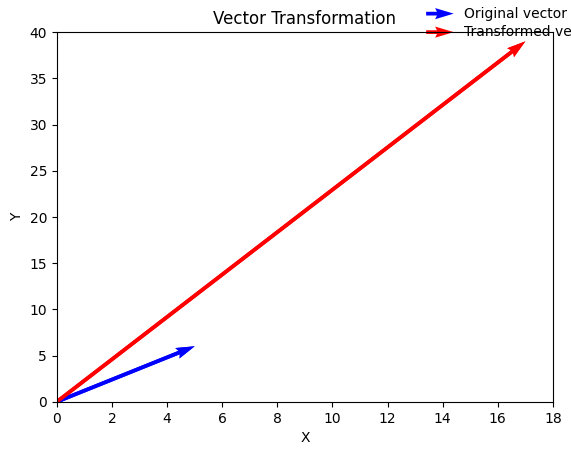

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dot_matrix_vector(matrix, vector):
    return np.dot(matrix, vector)

# Define the matrix and vector
matrix = np.array([[1, 2], [3, 4]])
vector = np.array([5, 6])

# Transform the vector using the matrix
transformed_vector = dot_matrix_vector(matrix, vector)

# Plot the original and transformed vectors
fig, ax = plt.subplots()
ax.quiver(0, 0, *vector, color='blue', angles='xy', scale_units='xy', scale=1)
ax.quiver(0, 0, *transformed_vector, color='red', angles='xy', scale_units='xy', scale=1)

# Set plot dimensions and labels
ax.set_xlim(0, max(vector[0], transformed_vector[0]) + 1)
ax.set_ylim(0, max(vector[1], transformed_vector[1]) + 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Vector Transformation')

# Add a legend to the plot
ax.quiverkey(ax.quiver(0, 0, *vector, color='blue', angles='xy', scale_units='xy', scale=1), 
             0.8, 1.05, 1, label='Original vector', labelpos='E')
ax.quiverkey(ax.quiver(0, 0, *transformed_vector, color='red', angles='xy', scale_units='xy', scale=1), 
             0.8, 1.0, 1, label='Transformed vector', labelpos='E')

# Show the plot
plt.show()


## System of Linear Equations

A system of equations 

Using the vector notation and replacing the paramters with theta, we get:

$$
    \begin{bmatrix}
        \theta_{11} & \theta_{12} & \theta_{13}\\
        \theta_{21} & \theta_{22} & \theta_{23}\\
        \theta_{31} & \theta_{32} & \theta_{33}
    \end{bmatrix}
    \begin{bmatrix}
        x_1\\
        x_2\\
        x_3
    \end{bmatrix}
    =
    \begin{bmatrix}
        z_{1}\\
        z_{2}\\
        z_{3}
    \end{bmatrix}
$$

Let's go through a concrete example:

**Row view**

$$
    \begin{bmatrix}
        2 & -1 & 0\\
        -1 & 2 & -1\\
        0 & -3 & 4
    \end{bmatrix}
    \begin{bmatrix}
        x\\
        y\\
        z
    \end{bmatrix}
    =
    \begin{bmatrix}
        0\\
        -1\\
        4
    \end{bmatrix}
$$

**Column view**

$$
    x\begin{bmatrix}
    2\\
    -1\\
    0
    \end{bmatrix}
    +y\begin{bmatrix}
    -1\\
    2\\
    -3
    \end{bmatrix}
    +z\begin{bmatrix}
    0\\
    -1\\
    4
    \end{bmatrix}
    =\begin{bmatrix}
    0\\
    -1\\
    4
    \end{bmatrix}
$$


Text(0.5, 0.92, 'Row view')

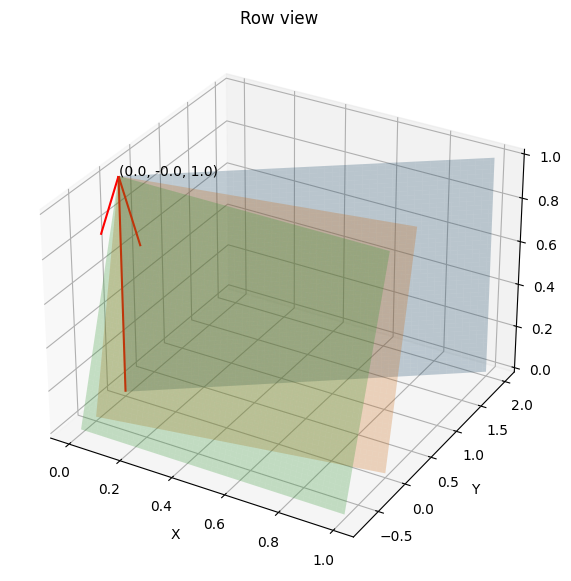

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

# lower and upper bound for space
l = 0
h = 1

# evaluation points
x = z = np.linspace(l, h, 100)
x, z = np.meshgrid(x, z)

# system of equations
A = np.array([[2, -1, 0],[-1, 2, -1],[0, -3, 4]])
b = np.array([[0],[-1], [4]])
sol = np.linalg.solve(A, b)

# solve for z
y0 = 2*x 
y1 = -.5 + .5*z + .5*x
y2 = -.75 + .75*z
equations = [y0, y1, y2]

# plot planes
for y in equations:
    ax.plot_surface(x, y, z, alpha=0.25)

# plot intersection
ax.quiver(0, 0, 0, sol[0], sol[1], sol[2], color='red')
s = [i for i in sol.flatten(order='C')]
ax.text(*s, '({}, {}, {})'.format(*s))

# set plot dimension and labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Row view')